In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")


In [17]:
df = pd.read_csv('/kaggle/input/top-cryptocurrencies-by-volume/Top Cryptos By Volume .csv',
                 parse_dates=["Date"])
df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Date,USDT-USD_Close,USDT-USD_Volume,BTC-USD_Close,BTC-USD_Volume,ETH-USD_Close,ETH-USD_Volume,USDC-USD_Close,USDC-USD_Volume,ZKJ-USD_Close,...,SYRUP-USD_Close,SYRUP-USD_Volume,INJ-USD_Close,INJ-USD_Volume,ICP-USD_Close,ICP-USD_Volume,WBT-USD_Close,WBT-USD_Volume,LPT-USD_Close,LPT-USD_Volume
0,2014-09-17,NaN,NaN,457.334015,21056800.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,NaN,NaN,424.440002,34483200.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,NaN,NaN,394.795990,37919700.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,NaN,NaN,408.903992,36863600.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,NaN,NaN,398.821014,26580100.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
print("Shape:", df.shape)
print("\nNulls per column:")
print(df.isna().sum().sort_values(ascending=False).head(10))


Shape: (3922, 147)

Nulls per column:
EGL1-USD_Close       3914
EGL1-USD_Volume      3914
NXPC-USD_Volume      3893
NXPC-USD_Close       3893
USD1-USD_Close       3849
USD1-USD_Volume      3849
SERAPH-USD_Volume    3764
SERAPH-USD_Close     3764
RLUSD-USD_Close      3752
RLUSD-USD_Volume     3752
dtype: int64


In [19]:
cols = df.columns.drop("Date")
symbols = sorted({c.split("-USD_")[0] for c in cols})
symbols[:10], len(symbols)


(['AAVE', 'ADA', 'ANIME', 'APT', 'ARB', 'ATOM', 'AVAX', 'BCH', 'BNB', 'BONK'],
 73)

## Price Trends for Top 5 Coins

- Identify the 5 coins with the highest trading volume on the last date  
- Plot each coin’s **Close** price on one combined line chart  


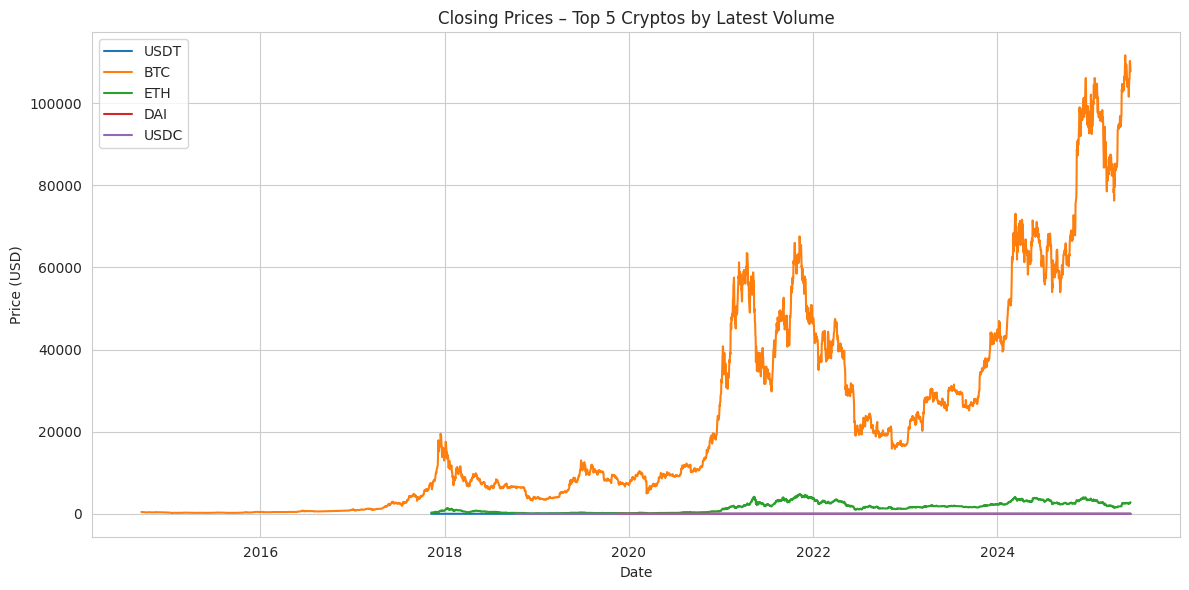

In [20]:
latest = df.iloc[-1]
vol_cols = [f"{sym}-USD_Volume" for sym in symbols]
top5 = latest[vol_cols].sort_values(ascending=False).head(5).index

plt.figure(figsize=(12,6))
for vol_col in top5:
    sym = vol_col.split("-USD_")[0]
    plt.plot(df["Date"], df[f"{sym}-USD_Close"], label=sym)
plt.title("Closing Prices – Top 5 Cryptos by Latest Volume")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()


## BTC Daily Trading Volume (Line Plot)

*This line chart displays Bitcoin’s daily trading volume (USD) over the entire dataset period, highlighting major surges and trends in market liquidity.*


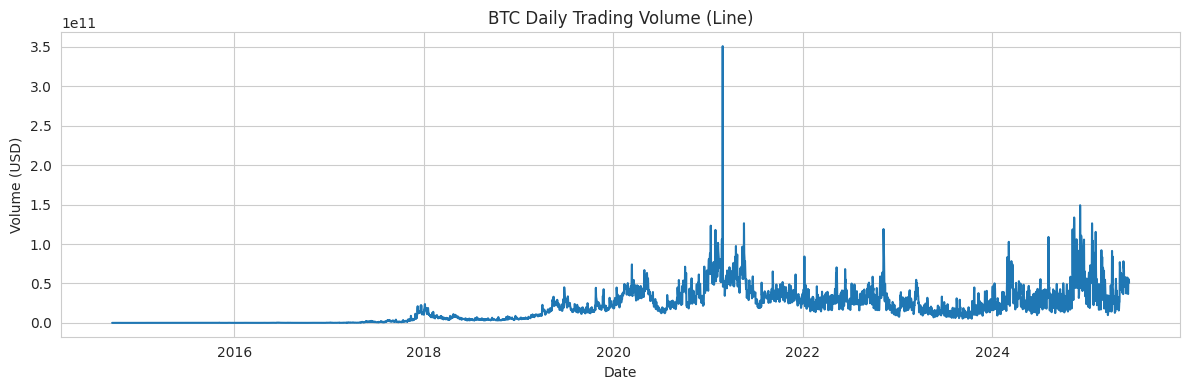

In [21]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

sym = 'BTC'
vol_col = f"{sym}-USD_Volume"

plt.figure(figsize=(12,4))
plt.plot(df.index, df[vol_col])
plt.title(f"{sym} Daily Trading Volume (Line)")
plt.xlabel("Date")
plt.ylabel("Volume (USD)")
plt.tight_layout()


## Correlation Heatmap of Returns

- Compute daily returns via `pct_change()` on all _Close_ columns  
- Select the top 10 symbols by latest volume  
- Render a heatmap of their return correlations with seaborn  


/tmp/ipykernel_35/2171618933.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df[close_cols].pct_change().dropna()
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


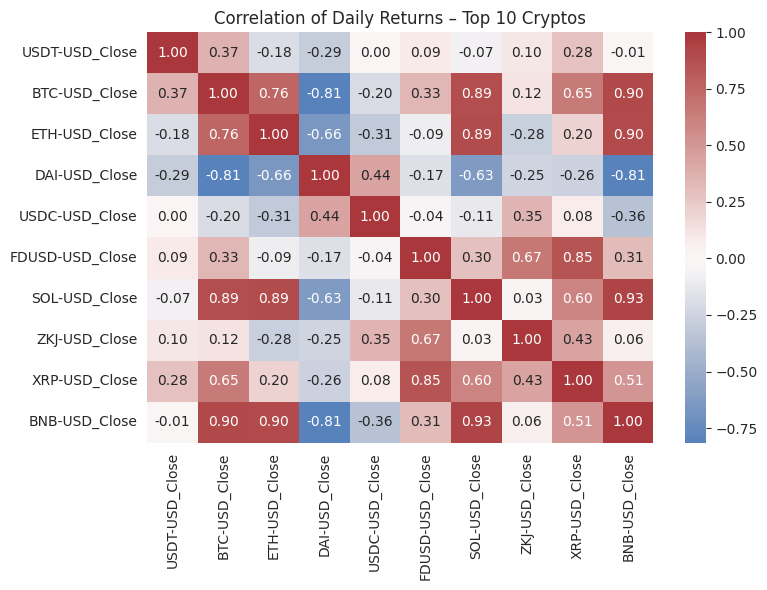

In [22]:
close_cols = [f"{sym}-USD_Close" for sym in symbols]
returns = df[close_cols].pct_change().dropna()

top10 = latest[vol_cols].sort_values(ascending=False).head(10).index
top10_syms = [c.split("-USD_")[0] for c in top10]

corr = returns[[f"{s}-USD_Close" for s in top10_syms]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Correlation of Daily Returns – Top 10 Cryptos")
plt.tight_layout()


## Distribution of Daily Returns

- Plot a histogram with a KDE overlay for BTC daily returns  
- Analyze tail behavior and skewness  


Number of daily return points: 3921


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


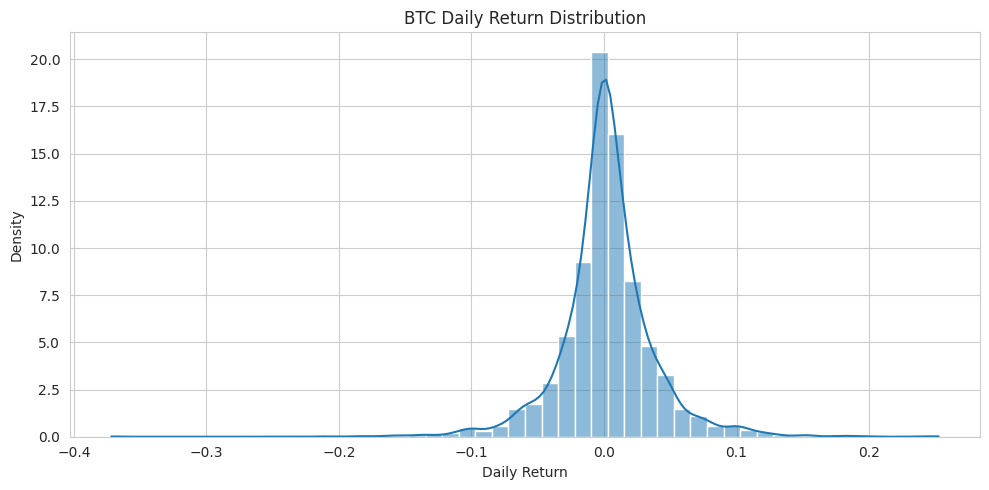

In [23]:
btc_ret = df['BTC-USD_Close'].pct_change().dropna()

print("Number of daily return points:", len(btc_ret))

plt.figure(figsize=(10,5))
sns.histplot(
    btc_ret,           # the data
    bins=50,           # you can lower this if <100 points
    kde=True,          # overlay KDE
    stat="density"     # so histogram is on the same scale as KDE
)
plt.title("BTC Daily Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.tight_layout()
plt.show()
